In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from timeit import default_timer as timer
from multiprocessing import Pool
from functools import partial
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utilities")

from Elo_optimazation_parameters import run_elo_tuning

In [2]:
data = pd.read_csv('../data/preprocess_data.csv',sep = ',')

In [3]:
pd.options.display.max_columns = None
data.head(5)

,Tournament,Home Team,Away Team,Match Date,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods,Team,Opponent Team,Team Points,Team Two Pointers Made,Team Two Pointers Attempted,Team Two Pointers Percenage,Team Three Pointers Made,Team Three Pointers Attempted,Team Three Pointers Percenage,Team Free Throws Made,Team Free Throws Attempted,Team Free Throws Percenage,Team Offensive Rebounds,Team Defensive Rebounds,Team Total Rebounds,Team Assists,Team Steals,Team Turnovers,Team Blocks,Team Blocks Against,Team Personal Fouls,Team Fouls Received,Team Performance Index,Opponent Points,Opponent Two Pointers Made,Opponent Two Pointers Attempted,Opponent Two Pointers Percenage,Opponent Three Pointers Made,Opponent Three Pointers Attempted,Opponent Three Pointers Percenage,Opponent Free Throws Made,Opponent Free Throws Attempted,Opponent Free Throws Percenage,Opponent Offensive Rebounds,Opponent Defensive Rebounds,Opponent Total Rebounds,Opponent Assists,Opponent Steals,Opponent Turnovers,Opponent Blocks,Opponent Blocks Against,Opponent Personal Fouls,Opponent Fouls Received,Opponent Performance Index,Team Result,teamFGA,teamFGM,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamPoss,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,teamFIC,teamOrtg,opptFGA,opptPoss,teamDrtg,teamEDiff,team_Game_Score,opptFGM,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,oppt_Game_Score,Points difference,Finals,Last 32,Playoffs,Quarter-Finals,Regular Season,Semifinals,Top 16
0,Basket League,KAOD,Aris,2013-10-12,Aris,Away,Regular Season,58-66,0.0,KAOD,Aris,58.0,20.0,43.0,0.46512,1.0,10.0,0.10000,15.0,26.0,0.57692,12.0,22.0,34.0,6.0,6.0,17.0,3.0,3.0,22.0,22.0,40.0,66.0,15.0,33.0,0.45455,9.0,23.0,0.39130,9.0,19.0,0.47368,10.0,18.0,28.0,11.0,8.0,14.0,3.0,3.0,22.0,22.0,57.0,0.0,53.0,21.0,54.838710,28.571429,45.003104,40.566038,40.000000,68.750000,20.874263,69.44,8.640553,4.320276,9.090909,1.094340,36.206897,9.293680,0.352941,0.352941,24.000,83.525346,56.0,68.36,96.547689,-13.022343,26.4,24.0,45.161290,45.833333,51.274083,50.892857,31.250000,60.000000,17.866258,11.702750,4.388531,6.976744,1.178571,37.375,96.547689,83.525346,13.022343,40.000000,15.143172,0.785714,0.571429,39.8,-8.0,0,0,0,0,1,0,0
1,Basket League,PAOK,Kolossos Rhodes,2013-10-12,PAOK,Home,Regular Season,88-81,0.0,PAOK,Kolossos Rhodes,88.0,17.0,35.0,0.48571,10.0,26.0,0.38462,24.0,26.0,0.92308,9.0,22.0,31.0,22.0,7.0,18.0,3.0,1.0,23.0,23.0,96.0,81.0,26.0,42.0,0.61905,5.0,16.0,0.31250,14.0,21.0,0.66667,6.0,25.0,31.0,5.0,8.0,18.0,1.0,3.0,24.0,22.0,69.0,1.0,61.0,27.0,50.000000,81.481481,60.739923,52.459016,26.470588,78.571429,19.902698,81.44,8.595285,3.683694,7.142857,1.442623,38.571429,24.564538,1.222222,0.388889,60.500,108.055010,58.0,79.24,102.221100,5.833909,65.5,31.0,50.000000,16.129032,60.232005,57.758621,21.428571,73.529412,21.116847,10.095911,1.261989,2.857143,1.396552,38.375,102.221100,108.055010,-5.833909,44.285714,6.967670,0.277778,0.444444,46.3,7.0,0,0,0,0,1,0,0
2,Liga ACB,Bilbao,Zaragoza,2013-10-12,Zaragoza,Away,Regular Season,77-86,0.0,Bilbao,Zaragoza,77.0,24.0,46.0,0.52000,5.0,12.0,0.42000,14.0,20.0,0.70000,13.0,19.0,32.0,15.0,7.0,12.0,1.0,1.0,18.0,23.0,89.0,86.0,25.0,39.0,0.64000,10.0,23.0,0.43000,6.0,10.0,0.60000,9.0,20.0,29.0,16.0,10.0,10.0,1.0,1.0,23.0,18.0,95.0,0.0,58.0,29.0,52.459016,51.724138,57.634731,54.310345,39.393939,67.857143,15.228426,65.80,10.638298,1.519757,2.564103,1.327586,50.877193,19.685039,1.250000,0.583333,55.250,117.021277,62.0,67.40,127.596439,-10.575163,59.4,35.0,47.540984,45.714286,64.759036,64.516129,32.142857,60.606061,13.089005,14.836795,1.483680,2.173913,1.387097,65.250,127.596439,117.021277,10.575163,55.555556,19.138756,1.600000,1.000000,70.0,-9.0,0,0,0,0,1,0,0
3,Basket League,Trikala,Kifisia,2013-10-12,Kifisia,Away,Regular Season,64-69,0.0,Trikala,Kifisia,64.0,21.0,41.0,0.51220,

In [4]:
data['Match Date']=pd.to_datetime(data['Match Date'])

In [5]:
data.shape

(5214, 108)

In [6]:
data['Tournament'].unique()

array(['Basket League', 'Liga ACB', 'Eurocup', 'Euroleague'], dtype=object)

# Elo 

# Greek Basket league

In [7]:
df_matches = data[(data['Tournament']=='Basket League') & (data['Match Date'] < '2017-8-1')].reset_index(drop=True)
Data_Frame = data[(data['Tournament']=='Basket League')].reset_index(drop=True)
lamda_values = np.arange(0.1, 3.6, 0.1)
k0_values = list(range(1,61))



start = timer()
if __name__ ==  '__main__':
    pool = Pool(processes=6)  
    chunks = np.array_split(lamda_values, 6)
    result = pool.map(partial(run_elo_tuning,matches = df_matches, Data_Frame = Data_Frame,k0_values = k0_values), chunks)

    greek_loss_array=np.concatenate(result)

    pool.terminate()
    pool.join()
end = timer()
print ("time:")
print ((end - start)/60)



time:
44.894654833333334


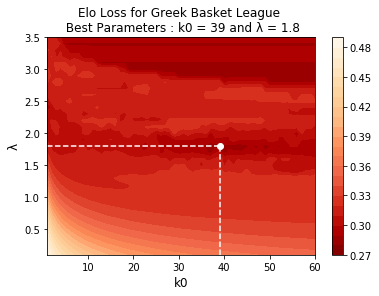

In [8]:
best_lamda,best_k0 = np.where(greek_loss_array == np.min(greek_loss_array))
X, Y = np.meshgrid(k0_values,lamda_values)
Z = greek_loss_array
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 20, cmap='OrRd_r')
ax.plot(k0_values[best_k0[0]],lamda_values[best_lamda[0]],'-o',color='white') 
ax.vlines(k0_values[best_k0[0]], 0.1, lamda_values[best_lamda[0]], linestyle="dashed",color='white')
ax.hlines(lamda_values[best_lamda[0]], 1, k0_values[best_k0[0]], linestyle="dashed",color='white')

kwargs = {'format': '%.2f'}
fig.colorbar(cp,**kwargs) # Add a colorbar to a plot
title = 'Elo Loss for Greek Basket League \n Best Parameters : k0 = ' + str(k0_values[best_k0[0]]) + ' and λ = ' + str(round(lamda_values[best_lamda[0]],2))
ax.set_title(title)
ax.set_xlabel('k0', fontsize=12)
ax.set_ylabel('λ', fontsize=12)
plt.savefig('Figures/elo_loss_greek.png')
plt.show()

In [9]:
np.min(greek_loss_array)

0.27993370235928333

In [10]:
df_matches = data[(data['Tournament']=='Basket League') & (data['Match Date'] < '2017-8-1')].reset_index(drop=True)
Data_Frame = data[(data['Tournament']=='Basket League')].reset_index(drop=True)
run_elo_tuning(matches = df_matches, Data_Frame = Data_Frame,k0_values = [29.75],lamda_values=[2.225])

C:\Users\User\Desktop\paper_new\Paper_Code_Data\paper_code_notebooks\utilities\Elo_rating_system.py:132: RuntimeWarning: overflow encountered in double_scalars
  return ( 1+10**( ( opponent.rating-self.rating )/400.0 ) ) ** -1
C:\Users\User\Desktop\paper_new\Paper_Code_Data\paper_code_notebooks\utilities\Elo_optimazation_parameters.py:29: RuntimeWarning: overflow encountered in double_scalars
  elo_expected_home=( 1+10**( ( elo_away-elo_home )/400.0 ) ) ** -1


array([[0.31017788]])

In [11]:
greek_loss_array

array([[0.48336922, 0.47033223, 0.45934312, ..., 0.35542651, 0.35506986,
        0.35472377],
       [0.47865525, 0.46260754, 0.4497602 , ..., 0.3484695 , 0.34817753,
        0.3478946 ],
       [0.47267503, 0.45340789, 0.43888102, ..., 0.34243876, 0.34220644,
        0.34198161],
       ...,
       [0.32333253, 0.3133574 , 0.30784016, ..., 0.29272727, 0.29272727,
        0.29272727],
       [0.31171063, 0.31029661, 0.31490033, ..., 0.28848485, 0.28848485,
        0.28848485],
       [0.31055834, 0.3168683 , 0.3084674 , ..., 0.29878589, 0.2987861 ,
        0.29878628]])

In [16]:
np.save('saved_losses/greek_elo_loss.npy', greek_loss_array)

# Liga ACB

In [8]:
df_matches = data[(data['Tournament']=='Liga ACB') & (data['Match Date'] < '2017-8-1')].reset_index(drop=True)
Data_Frame = data[(data['Tournament']=='Liga ACB')].reset_index(drop=True)
lamda_values = np.arange(0.1, 3.6, 0.1)
k0_values = list(range(1,61))



start = timer()
if __name__ ==  '__main__':
    pool = Pool(processes=6)  
    chunks = np.array_split(lamda_values, 6)
    result = pool.map(partial(run_elo_tuning,matches = df_matches, Data_Frame = Data_Frame,k0_values = k0_values), chunks)

    spain_loss_array=np.concatenate(result)

    pool.terminate()
    pool.join()
end = timer()
print ("time:")
print ((end - start)/60)



time:
72.07951670333333


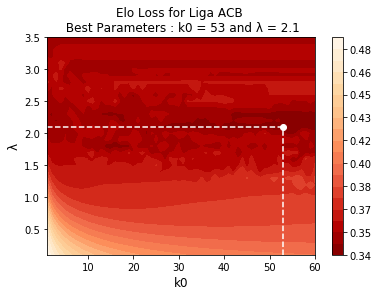

In [14]:
best_lamda,best_k0 = np.where(spain_loss_array == np.min(spain_loss_array))
X, Y = np.meshgrid(k0_values,lamda_values)
Z = spain_loss_array
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 20, cmap='OrRd_r')
ax.plot(k0_values[best_k0[0]],lamda_values[best_lamda[0]],'-o',color='white') 
ax.vlines(k0_values[best_k0[0]], 0.1, lamda_values[best_lamda[0]], linestyle="dashed",color='white')
ax.hlines(lamda_values[best_lamda[0]], 1, k0_values[best_k0[0]], linestyle="dashed",color='white')

kwargs = {'format': '%.2f'}
fig.colorbar(cp,**kwargs) # Add a colorbar to a plot # Add a colorbar to a plot
title = 'Elo Loss for Liga ACB \n Best Parameters : k0 = ' + str(k0_values[best_k0[0]]) + ' and λ = ' + str(round(lamda_values[best_lamda[0]],2))
ax.set_title(title)
ax.set_xlabel('k0', fontsize=12)
ax.set_ylabel('λ', fontsize=12)
plt.savefig('Figures/elo_loss_spain.png')
plt.show()

In [15]:
np.min(spain_loss_array)

0.33664431036641995

In [16]:
df_matches = data[(data['Tournament']=='Liga ACB') & (data['Match Date'] < '2017-8-1')].reset_index(drop=True)
Data_Frame = data[(data['Tournament']=='Liga ACB')].reset_index(drop=True)
run_elo_tuning(matches = df_matches, Data_Frame = Data_Frame,k0_values = [29.75],lamda_values=[2.225])

array([[0.34787821]])

In [17]:
spain_loss_array

array([[0.4871425 , 0.47684795, 0.46833555, ..., 0.40019565, 0.40005458,
        0.39992021],
       [0.48352373, 0.47097441, 0.4610959 , ..., 0.39543217, 0.395345  ,
        0.3952637 ],
       [0.47895109, 0.46396623, 0.45282926, ..., 0.39137488, 0.3913441 ,
        0.39131814],
       ...,
       [0.34949156, 0.35062939, 0.35485166, ..., 0.35920535, 0.35910288,
        0.35877287],
       [0.34736561, 0.34750602, 0.34901406, ..., 0.35117187, 0.35117187,
        0.35117187],
       [0.34767812, 0.34647873, 0.34725994, ..., 0.34804687, 0.34804687,
        0.34804687]])

In [17]:
np.save('saved_losses/spain_elo_loss.npy', spain_loss_array)

# Euroleague

In [10]:
df_matches = data[(data['Tournament']=='Euroleague') & (data['Match Date'] < '2017-8-1')].reset_index(drop=True)
Data_Frame = data[(data['Tournament']=='Euroleague')].reset_index(drop=True)
lamda_values = np.arange(0.1, 3.6, 0.1)
k0_values = list(range(1,61))



start = timer()
if __name__ ==  '__main__':
    pool = Pool(processes=6)  
    chunks = np.array_split(lamda_values, 6)
    result = pool.map(partial(run_elo_tuning,matches = df_matches, Data_Frame = Data_Frame,k0_values = k0_values), chunks)

    euroleague_loss_array=np.concatenate(result)

    pool.terminate()
    pool.join()
end = timer()
print ("time:")
print ((end - start)/60)



time:
44.717279005


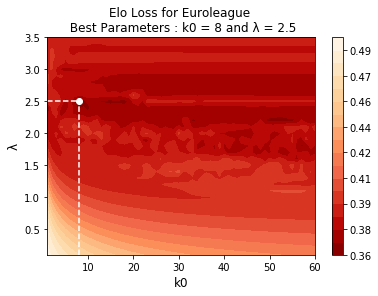

In [19]:
best_lamda,best_k0 = np.where(euroleague_loss_array == np.min(euroleague_loss_array))
X, Y = np.meshgrid(k0_values,lamda_values)
Z = euroleague_loss_array
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 20, cmap='OrRd_r')
ax.plot(k0_values[best_k0[0]],lamda_values[best_lamda[0]],'-o',color='white') 
ax.vlines(k0_values[best_k0[0]], 0.1, lamda_values[best_lamda[0]], linestyle="dashed",color='white')
ax.hlines(lamda_values[best_lamda[0]], 1, k0_values[best_k0[0]], linestyle="dashed",color='white')

kwargs = {'format': '%.2f'}
fig.colorbar(cp,**kwargs) # Add a colorbar to a plot 
title = 'Elo Loss for Euroleague \n Best Parameters : k0 = ' + str(k0_values[best_k0[0]]) + ' and λ = ' + str(round(lamda_values[best_lamda[0]],2))
ax.set_title(title)
ax.set_xlabel('k0', fontsize=12)
ax.set_ylabel('λ', fontsize=12)
plt.savefig('Figures/elo_loss_euroleague.png')
plt.show()

In [20]:
np.min(euroleague_loss_array)

0.3603219744007668

In [21]:
df_matches = data[(data['Tournament']=='Euroleague') & (data['Match Date'] < '2017-8-1')].reset_index(drop=True)
Data_Frame = data[(data['Tournament']=='Euroleague')].reset_index(drop=True)
run_elo_tuning(matches = df_matches, Data_Frame = Data_Frame,k0_values = [29.75],lamda_values=[2.225])

array([[0.37051545]])

In [22]:
euroleague_loss_array

array([[0.49199734, 0.48660084, 0.48178125, ..., 0.42271135, 0.42250322,
        0.42230206],
       [0.49026634, 0.48354753, 0.47772873, ..., 0.41790839, 0.41773317,
        0.41756392],
       [0.48804524, 0.47976849, 0.47286755, ..., 0.41340343, 0.41325534,
        0.41311224],
       ...,
       [0.38485557, 0.39379902, 0.3892919 , ..., 0.38189904, 0.38189684,
        0.38189464],
       [0.38531212, 0.38830805, 0.38846425, ..., 0.38505631, 0.38505752,
        0.38505872],
       [0.38338928, 0.38858684, 0.38911705, ..., 0.38746298, 0.38746298,
        0.38746298]])

In [18]:
np.save('saved_losses/euroleague_elo_loss.npy', euroleague_loss_array)

# Eurocup

In [13]:
df_matches = data[(data['Tournament']=='Eurocup') & (data['Match Date'] < '2017-8-1')].reset_index(drop=True)
Data_Frame = data[(data['Tournament']=='Eurocup')].reset_index(drop=True)
lamda_values = np.arange(0.1, 3.6, 0.1)
k0_values = list(range(1,61))



start = timer()
if __name__ ==  '__main__':
    pool = Pool(processes=6)  
    chunks = np.array_split(lamda_values, 6)
    result = pool.map(partial(run_elo_tuning,matches = df_matches, Data_Frame = Data_Frame,k0_values = k0_values), chunks)

    eurocup_loss_array=np.concatenate(result)

    pool.terminate()
    pool.join()
end = timer()
print ("time:")
print ((end - start)/60)



time:
35.789814376666676


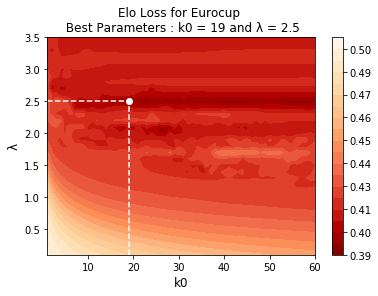

In [25]:
best_lamda,best_k0 = np.where(eurocup_loss_array == np.min(eurocup_loss_array))
X, Y = np.meshgrid(k0_values,lamda_values)
Z = eurocup_loss_array
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 20, cmap='OrRd_r')
ax.plot(k0_values[best_k0[0]],lamda_values[best_lamda[0]],'-o',color='white') 
ax.vlines(k0_values[best_k0[0]], 0.1, lamda_values[best_lamda[0]], linestyle="dashed",color='white')
ax.hlines(lamda_values[best_lamda[0]], 1, k0_values[best_k0[0]], linestyle="dashed",color='white')

kwargs = {'format': '%.2f'}
fig.colorbar(cp,**kwargs) # Add a colorbar to a plot
title = 'Elo Loss for Eurocup \n Best Parameters : k0 = ' + str(k0_values[best_k0[0]]) + ' and λ = ' + str(round(lamda_values[best_lamda[0]],2))
ax.set_title(title)
ax.set_xlabel('k0', fontsize=12)
ax.set_ylabel('λ', fontsize=12)
plt.savefig('Figures/elo_loss_eurocup.png')
plt.show()

In [26]:
 np.min(eurocup_loss_array)

0.39336941851782475

In [27]:
df_matches = data[(data['Tournament']=='Eurocup') & (data['Match Date'] < '2017-8-1')].reset_index(drop=True)
Data_Frame = data[(data['Tournament']=='Eurocup')].reset_index(drop=True)
run_elo_tuning(matches = df_matches, Data_Frame = Data_Frame,k0_values = [29.75],lamda_values=[2.225])

array([[0.42118934]])

In [28]:
eurocup_loss_array

array([[0.49874821, 0.49670578, 0.49475847, ..., 0.45359921, 0.45333215,
        0.45307211],
       [0.49804036, 0.49536619, 0.49285972, ..., 0.44872303, 0.44849047,
        0.44826493],
       [0.49709995, 0.4936207 , 0.4904332 , ..., 0.44425566, 0.44406187,
        0.4438745 ],
       ...,
       [0.41450434, 0.4121658 , 0.41468594, ..., 0.41431724, 0.41432322,
        0.41432843],
       [0.41494913, 0.41532152, 0.41425655, ..., 0.40990193, 0.40990192,
        0.40990191],
       [0.4185196 , 0.41543383, 0.4161003 , ..., 0.40874024, 0.40874293,
        0.40874561]])

In [19]:
np.save('saved_losses/eurocup_elo_loss.npy', eurocup_loss_array)